<a href="https://colab.research.google.com/github/ASMITHAVARSHA/Employing-Machine-Learning-models-for-Flood-Prediction/blob/main/FLOOD_PREDICTION_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing all required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
#Read the data present in dataset
df = pd.read_csv('/content/kerala (1).csv')
#Using data.head() we can see the top 5 rows of the dataset
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO


In [ ]:
df.shape

(118, 16)

In [ ]:
df

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,KERALA,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4,YES
114,KERALA,2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4,2600.6,NO
115,KERALA,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6,2176.6,NO
116,KERALA,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1,2117.1,NO


In [ ]:
df.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,1959.500000,12.218644,15.633898,36.670339,110.330508,228.644915,651.617797,698.220339,430.369492,246.207627,293.207627,162.311017,40.009322,2925.405085
std,34.207699,15.473766,16.406290,30.063862,44.633452,147.548778,186.181363,228.988966,181.980463,121.901131,93.705253,83.200485,36.676330,452.169407
min,1901.000000,0.000000,0.000000,0.100000,13.100000,53.400000,196.800000,167.500000,178.600000,41.300000,68.500000,31.500000,0.100000,2068.800000
25%,1930.250000,2.175000,4.700000,18.100000,74.350000,125.050000,535.550000,533.200000,316.725000,155.425000,222.125000,93.025000,10.350000,2613.525000
50%,1959.500000,5.800000,8.350000,28.400000,110.400000,184.600000,625.600000,691.650000,386.250000,223.550000,284.300000,152.450000,31.100000,2934.300000
75%,1988.750000,18.175000,21.400000,49.825000,136.450000,264.875000,786.975000,832.425000,500.100000,334.500000,355.150000,218.325000,54.025000,3170.400000
max,2018.000000,83.500000,79.000000,217.200000,238.000000,738.800000,1098.200000,1526.500000,1398.900000,526.700000,567.900000,365.600000,202.300000,4473.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SUBDIVISION       118 non-null    object 
 1   YEAR              118 non-null    int64  
 2   JAN               118 non-null    float64
 3   FEB               118 non-null    float64
 4   MAR               118 non-null    float64
 5   APR               118 non-null    float64
 6   MAY               118 non-null    float64
 7   JUN               118 non-null    float64
 8   JUL               118 non-null    float64
 9   AUG               118 non-null    float64
 10  SEP               118 non-null    float64
 11  OCT               118 non-null    float64
 12  NOV               118 non-null    float64
 13  DEC               118 non-null    float64
 14   ANNUAL RAINFALL  118 non-null    float64
 15  FLOODS            118 non-null    object 
dtypes: float64(13), int64(1), object(2)
memory u

In [ ]:
df.isna().sum()

SUBDIVISION         0
YEAR                0
JAN                 0
FEB                 0
MAR                 0
APR                 0
MAY                 0
JUN                 0
JUL                 0
AUG                 0
SEP                 0
OCT                 0
NOV                 0
DEC                 0
 ANNUAL RAINFALL    0
FLOODS              0
dtype: int64

In [ ]:
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO


In [ ]:
df['FLOODS'].replace(['YES','NO'],[1,0],inplace=True)

In [ ]:
df

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,1
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,1
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,1
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,1
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,KERALA,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4,1
114,KERALA,2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4,2600.6,0
115,KERALA,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6,2176.6,0
116,KERALA,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1,2117.1,0


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

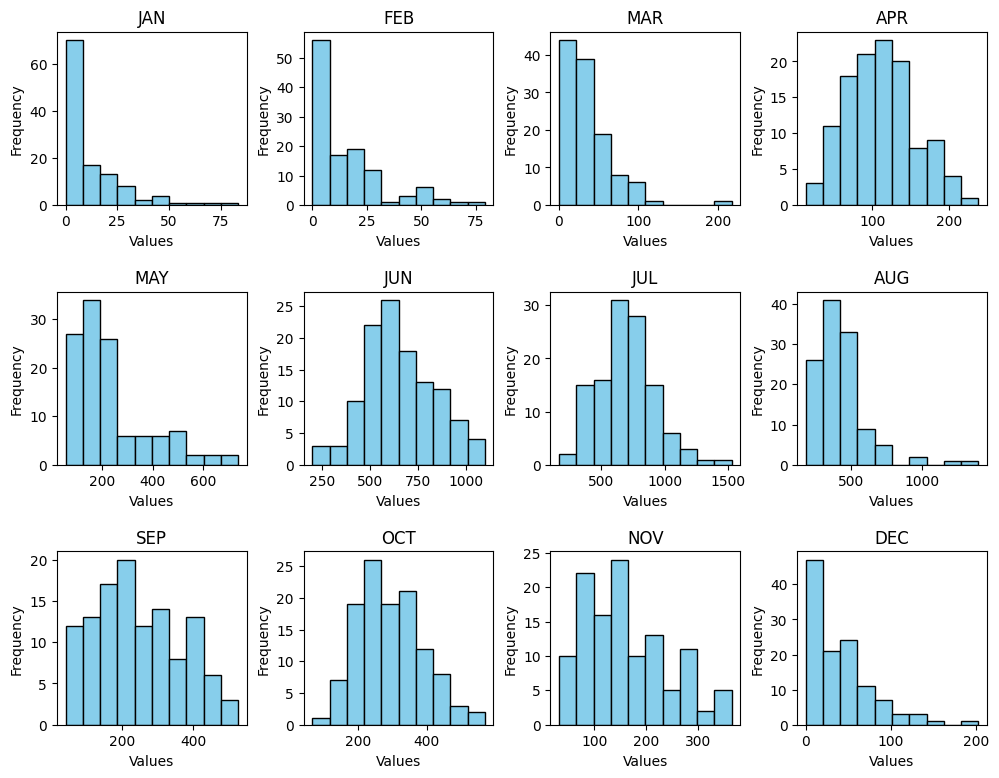

In [ ]:
# Creating a 3x4 grid of subplots to plot histograms for each month's data

c = df[['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']]
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 9), gridspec_kw={'hspace': 0.5, 'wspace': 0.3})

# Flatten the 2D axes array to 1D for easy iteration
axes = axes.ravel()

# Plot each histogram in a separate subplot
for i, col in enumerate(c.columns):
    axes[i].hist(c[col], bins=10, color='skyblue', edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Frequency')

# Show the plot
plt.show()

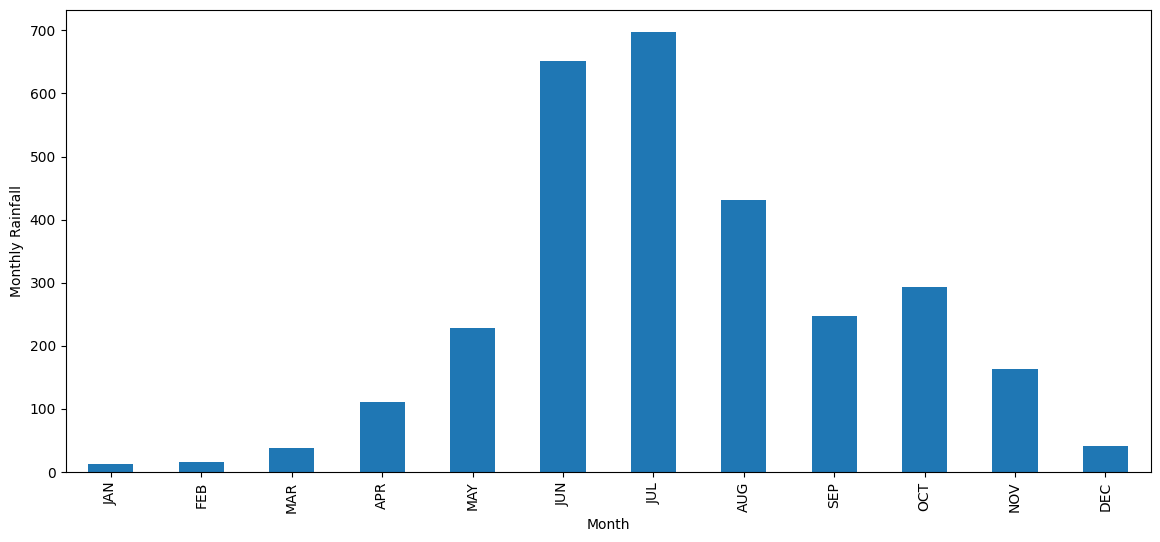

In [ ]:
# Creating a bar plot of the average (mean) monthly rainfall for each month

mx = df[['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']].mean().plot.bar(figsize=(14,6))
plt.xlabel('Month')
plt.ylabel('Monthly Rainfall')
plt.show()

<Axes: xlabel='FLOODS', ylabel='count'>

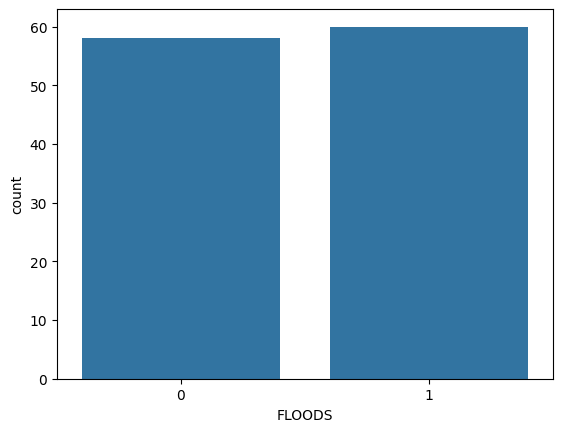

In [ ]:
sns.countplot(x='FLOODS',data=df)

In [ ]:
x = df.iloc[:,1:14]
x.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2


In [ ]:
y = df.iloc[:, -1]
y

0      1
1      1
2      1
3      1
4      0
      ..
113    1
114    0
115    0
116    0
117    1
Name: FLOODS, Length: 118, dtype: int64

In [ ]:
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(x).transform(x)

array([[0.        , 0.34371257, 0.56582278, ..., 0.39727673, 0.95570189,
        0.2388724 ],
       [0.00854701, 0.08023952, 0.03291139, ..., 0.5804966 , 0.37952709,
        0.60039565],
       [0.01709402, 0.03832335, 0.23544304, ..., 0.57188626, 0.37563604,
        0.29129575],
       ...,
       [0.98290598, 0.02874251, 0.04810127, ..., 0.31517821, 0.28105358,
        0.11622156],
       [0.99145299, 0.02275449, 0.08607595, ..., 0.24809772, 0.18258007,
        0.18793274],
       [1.        , 0.34850299, 0.65949367, ..., 0.57589107, 0.28105358,
        0.3214639 ]])

In [ ]:
#Data might be widely distributed so let's scale it between 0 and 1
#Let's divide the dataset into 2 sets:train and test in ratio (4:1)
from sklearn import model_selection,neighbors
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=42)

In [ ]:
# Decision Tree Classification

dtc_clf = DecisionTreeClassifier()
dtc_clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
# Predicting on x_test

y_pred = dtc_clf.predict(x_test)
y_pred

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0])

In [ ]:
# Priting the accuracy of the model

acc1 = metrics.accuracy_score(y_test,y_pred)
print("Accuracy:", acc1)

Accuracy: 0.6944444444444444


In [ ]:
# Evaluating model performance, and understanding how well the model's predictions align with the ground truth using Decision Tree

pd.DataFrame({'Actual':y_test,'Prediction':y_pred})

,Actual,Prediction
56,1,1
89,0,0
4,0,0
45,1,1
26,1,1
116,0,1
69,0,1
10,0,0
90,1,1
73,0,1


In [ ]:
# Random Forest Classification

clf = RandomForestClassifier(n_estimators = 200)
clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200)

In [ ]:
# Predicting on x_test

y_pred2= clf.predict(x_test)
y_pred2

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0])

In [ ]:
# Priting the accuracy of the model

acc2 = metrics.accuracy_score(y_test,y_pred2)
print("Accuracy of Random Forest:", acc2)

Accuracy of Random Forest: 0.8611111111111112


In [ ]:
# Evaluating model performance, and understanding how well the model's predictions align with the ground truth using Random Forest

pd.DataFrame({'Actual':y_test,'Prediction':y_pred2})

,Actual,Prediction
56,1,1
89,0,0
4,0,0
45,1,1
26,1,1
116,0,0
69,0,0
10,0,0
90,1,1
73,0,1


In [ ]:
# Defining the hyperparameter grid for RandomizedSearchCV
param_grid = {
    'max_depth': [None, 20, 50, 70],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4, 8],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

# Creating the RandomizedSearchCV object
random_search = RandomizedSearchCV(clf, param_distributions=param_grid, n_iter=10, cv=5, n_jobs=-1)

# Fitting the RandomizedSearchCV to the data
random_search.fit(x_train, y_train)

# Getting the best hyperparameters and best model from RandomizedSearchCV
best_params_random = random_search.best_params_
best_model_random = random_search.best_estimator_

In [ ]:
# Predicting on x_test

y_pred3= best_model_random.predict(x_test)
y_pred3

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0])

In [ ]:
# Priting the accuracy of the model

acc3 = metrics.accuracy_score(y_test,y_pred3)
print("Accuracy of RandomizedSearchCV on Random Forest:", acc3)

Accuracy of RandomizedSearchCV on Random Forest: 0.8333333333333334


In [ ]:
# Evaluating model performance, and understanding how well the model's predictions align with the ground truth using RandomizedSearchCV

pd.DataFrame({'Actual':y_test,'Prediction':y_pred3})

,Actual,Prediction
56,1,1
89,0,0
4,0,0
45,1,1
26,1,1
116,0,0
69,0,0
10,0,1
90,1,1
73,0,1


In [ ]:
# Defining the hyperparameter grid for GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

# Creating the GridSearchCV object
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5, n_jobs=-1)

# Fitting the GridSearchCV to the data
grid_search.fit(x_train, y_train)

# Getting the best hyperparameters and best model from GridSearchCV
best_params_grid = grid_search.best_params_
best_model_grid = grid_search.best_estimator_

In [ ]:
# Predicting on x_test

y_pred4= best_model_grid.predict(x_test)
y_pred4

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0])

In [ ]:
# Priting the accuracy of the model

acc4 = metrics.accuracy_score(y_test,y_pred4)
print("Accuracy of GridSearchCV on Random Forest:", acc4)

Accuracy of GridSearchCV on Random Forest: 0.8333333333333334


In [ ]:
# Evaluating model performance, and understanding how well the model's predictions align with the ground truth using GridSearchCV

pd.DataFrame({'Actual':y_test,'Prediction':y_pred4})

,Actual,Prediction
56,1,1
89,0,0
4,0,0
45,1,1
26,1,1
116,0,0
69,0,0
10,0,0
90,1,1
73,0,1


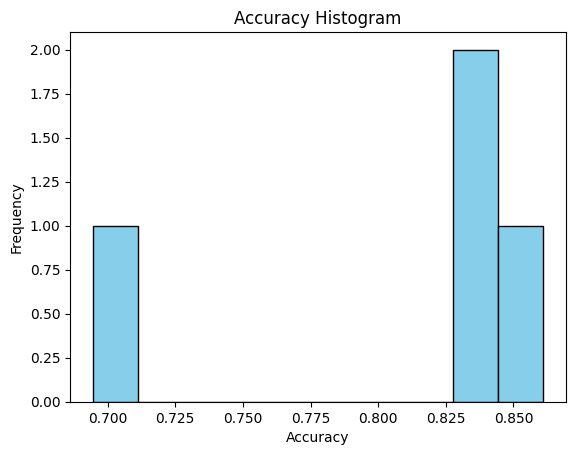

In [ ]:
# Generating histogram for every accuracy of each of models

acc_scores = [acc1, acc2, acc3, acc4]

# Creating a histogram for accuracy scores
plt.hist(acc_scores, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Accuracy Histogram')
plt.show()

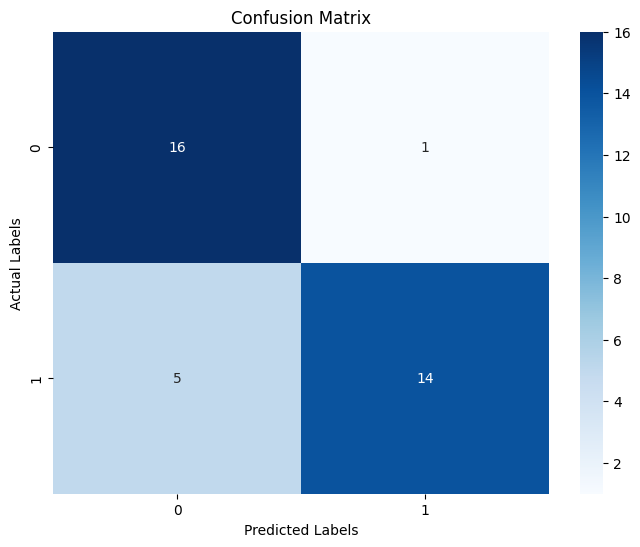

In [ ]:
# Computing the confusion matrix
cm = confusion_matrix(y_test, y_pred4)

# Creating a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(x).transform(x)


array([[0.        , 0.34371257, 0.56582278, ..., 0.39727673, 0.95570189,
        0.2388724 ],
       [0.00854701, 0.08023952, 0.03291139, ..., 0.5804966 , 0.37952709,
        0.60039565],
       [0.01709402, 0.03832335, 0.23544304, ..., 0.57188626, 0.37563604,
        0.29129575],
       ...,
       [0.98290598, 0.02874251, 0.04810127, ..., 0.31517821, 0.28105358,
        0.11622156],
       [0.99145299, 0.02275449, 0.08607595, ..., 0.24809772, 0.18258007,
        0.18793274],
       [1.        , 0.34850299, 0.65949367, ..., 0.57589107, 0.28105358,
        0.3214639 ]])

In [ ]:
clf = neighbors.KNeighborsClassifier()
knn_clf = clf.fit(x_train,y_train)

In [ ]:
#Let's predict chances of flood
y_predict = knn_clf.predict(x_test)
print('predicted chances of flood')
print(y_predict)

predicted chances of flood
[1 0 0 1 1 0 0 1 1 0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1]


In [ ]:
#Actual chances of flood
print("actual values of floods:")
print(y_test)

actual values of floods:
56     1
89     0
4      0
45     1
26     1
116    0
69     0
10     0
90     1
73     0
18     1
111    0
11     1
96     1
42     1
31     1
88     0
0      1
97     1
109    1
64     0
40     1
95     0
53     1
44     0
12     0
15     1
70     1
107    0
24     1
66     0
22     1
36     0
55     0
81     0
30     1
Name: FLOODS, dtype: int64


In [ ]:
from sklearn.model_selection import cross_val_score
knn_accuracy = cross_val_score(knn_clf,x_test,y_test,cv=3,scoring='accuracy',n_jobs=-1)
knn_accuracy.mean()

0.7777777777777778

In [ ]:
x_train_std = minmax.fit_transform(x_train)
x_test_std = minmax.transform(x_test)
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr_clf = lr.fit(x_train_std,y_train)

lr_accuracy = cross_val_score(lr_clf,x_test_std,y_test,cv=3,scoring='accuracy',n_jobs=-1)
lr_accuracy.mean()

0.7222222222222222

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score: %f"%(accuracy_score(y_test,y_predict)*100))
print("recall score: %f"%(recall_score(y_test,y_predict)*100))
print("roc score: %f"%(roc_auc_score(y_test,y_predict)*100))


accuracy score: 88.888889
recall score: 84.210526
roc score: 89.164087


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc_clf = DecisionTreeClassifier()
dtc_clf.fit(x_train,y_train)
dtc_clf_acc = cross_val_score(dtc_clf,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
dtc_clf_acc

array([0.57142857, 0.66666667, 0.85185185])

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))


accuracy score:69.444444
recall score:63.157895
roc score:69.814241


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rmf = RandomForestClassifier(max_depth=3,random_state=0)
rmf_clf = rmf.fit(x_train,y_train)
rmf_clf

RandomForestClassifier(max_depth=3, random_state=0)

In [ ]:
rmf_clf_acc = cross_val_score(rmf_clf,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)

In [ ]:
rmf_clf_acc

array([0.78571429, 0.66666667, 0.88888889])

In [ ]:
y_pred = rmf_clf.predict(x_test)
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))


accuracy score:83.333333
recall score:78.947368
roc score:83.591331


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

log_clf = LogisticRegression(solver="liblinear", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
knn_clf = KNeighborsClassifier()

voting = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('knn', knn_clf)],
    voting='hard')

In [ ]:
voting_clf = voting.fit(x_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, knn_clf, voting_clf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.9722222222222222
RandomForestClassifier 0.7222222222222222
KNeighborsClassifier 0.8888888888888888
VotingClassifier 0.8888888888888888


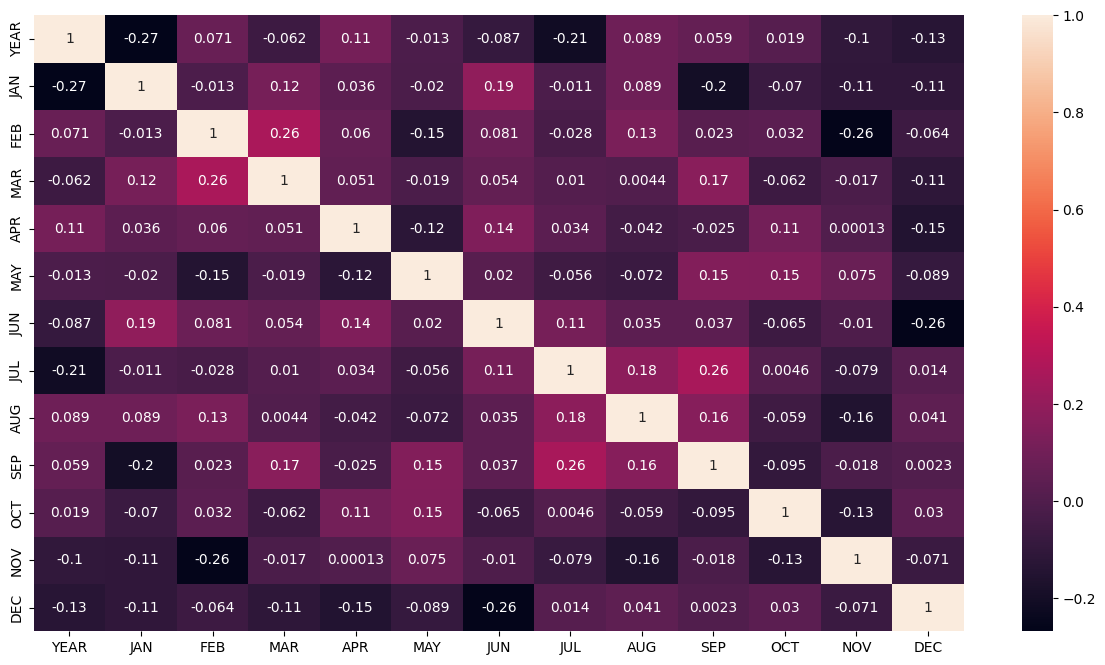

In [ ]:
plt.figure(figsize=[15,8])
sns.heatmap(x_train.corr(),annot=True);

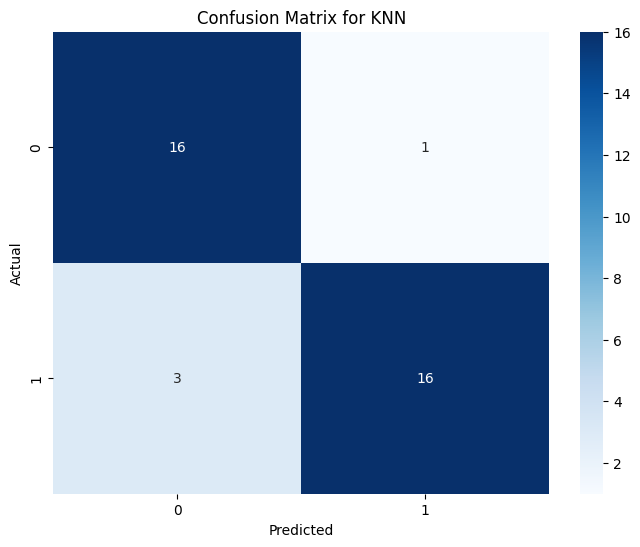

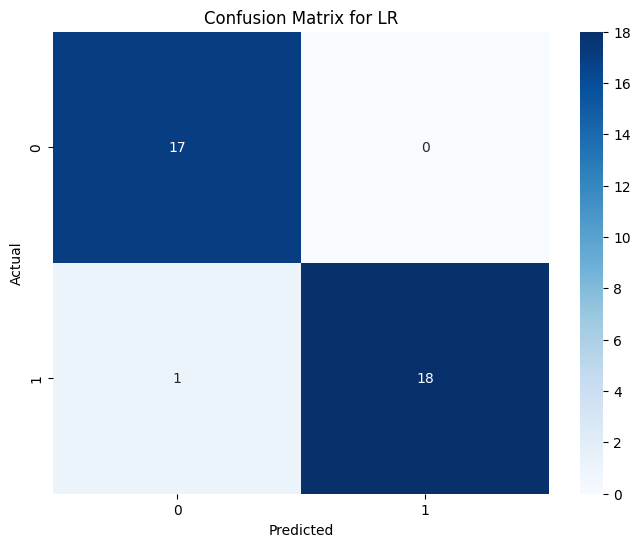

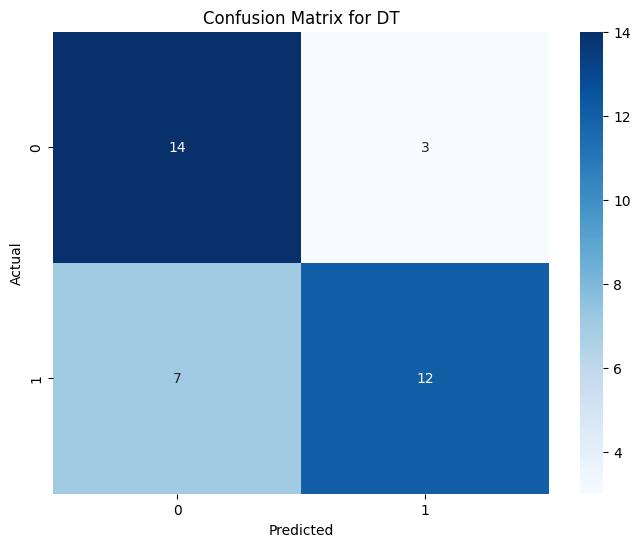

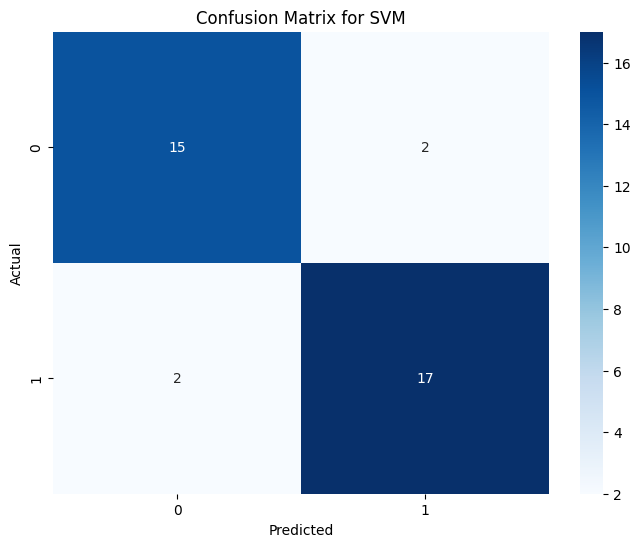

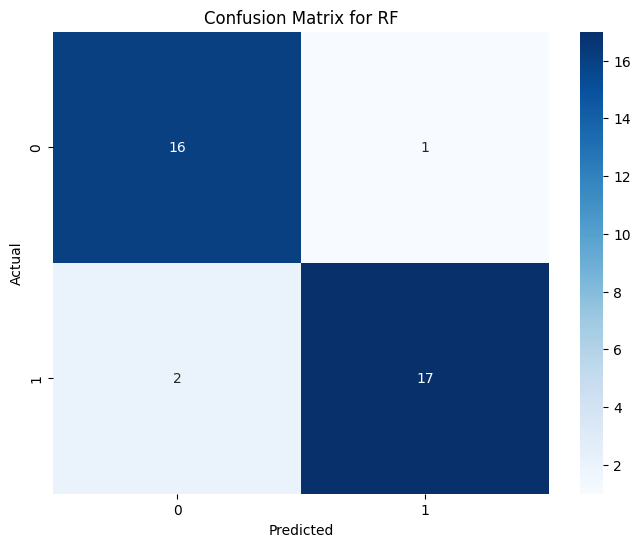

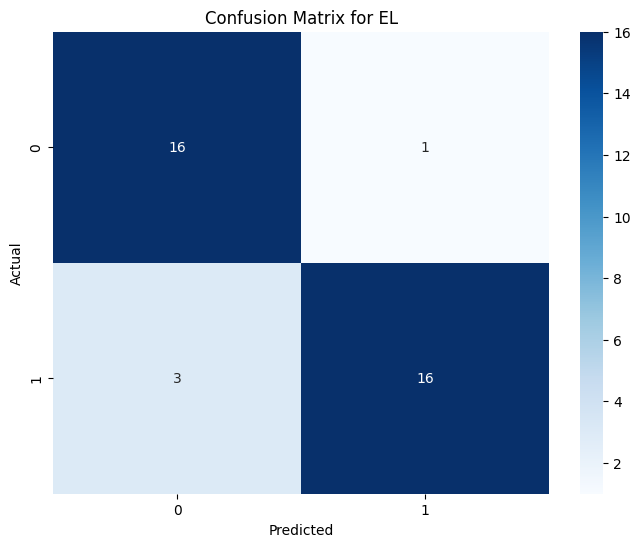

In [ ]:
models = []
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('SVM',SVC()))
models.append(('RF', RandomForestClassifier()))
models.append(('EL', VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('knn', knn_clf)],
    voting='hard')))



names = []
scores = []
precisions = []
recalls = []
f1_scores = []
roc_aucs = []

for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)

    names.append(name)
    scores.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    roc_aucs.append(roc_auc)

    # Plotting confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()







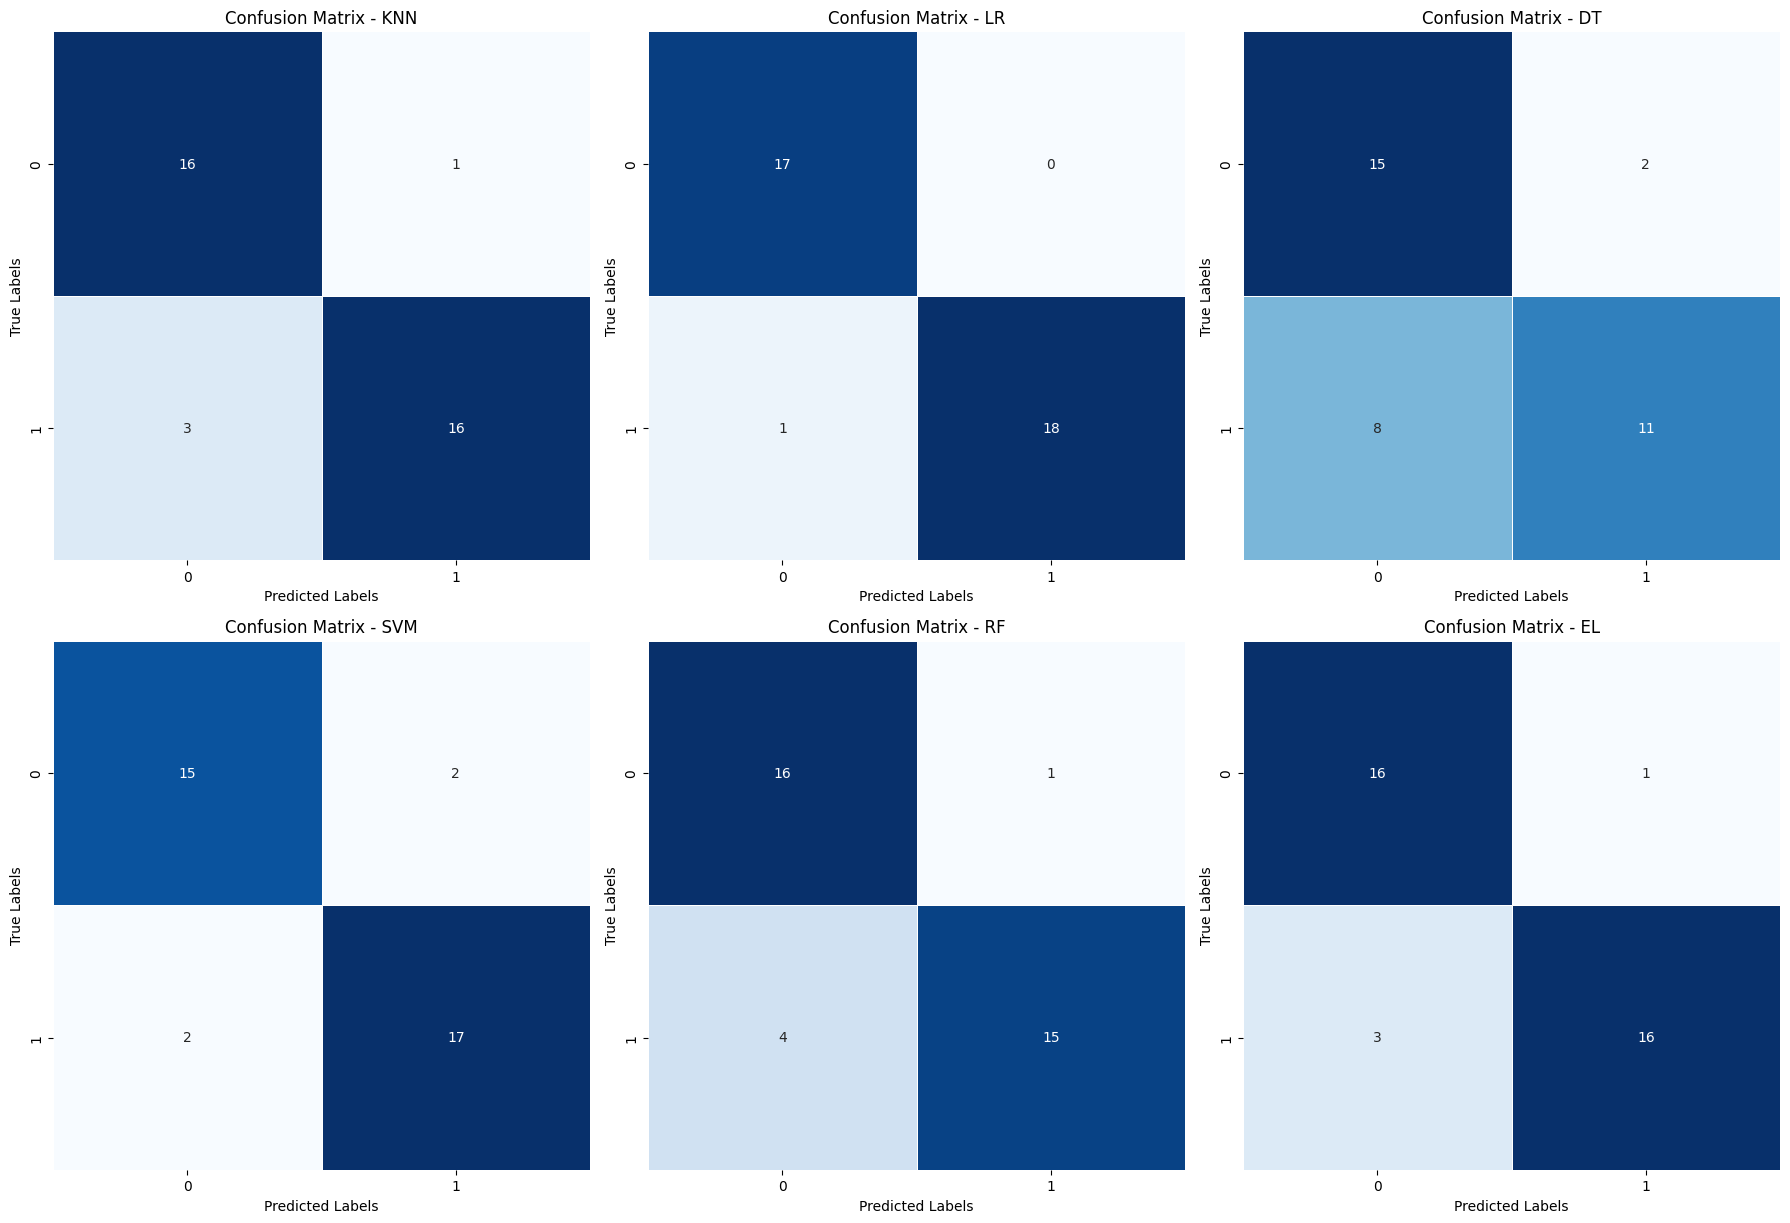

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define the number of rows and columns for subplots
num_rows = 3  # Number of rows for subplots (adjust as needed)
num_cols = 3  # Number of columns for subplots (adjust as needed)

# Create a figure and a set of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 18))  # Adjust figsize as needed

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot confusion matrix for each model
for i, (name, model) in enumerate(models):
    # Make predictions on test data
    y_pred = model.predict(x_test)

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)  # Ensure y_test and y_pred are the correct arrays

    # Plot confusion matrix on the corresponding subplot
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5, cbar=False, ax=axes[i])
    axes[i].set_title(f'Confusion Matrix - {name}')
    axes[i].set_xlabel('Predicted Labels')
    axes[i].set_ylabel('True Labels')

# Hide unused subplots if there are fewer models than subplots
for j in range(len(models), num_rows * num_cols):
    fig.delaxes(axes[j])

# Adjust layout and spacing between subplots
plt.tight_layout()
plt.show()



In [ ]:
tr_split = pd.DataFrame({'Name': names, 'Accuracy': scores, 'Precision': precisions, 'Recall': recalls, 'F1-Score': f1_scores, 'ROC AUC': roc_aucs})
print(tr_split)

  Name  Accuracy  Precision    Recall  F1-Score   ROC AUC
0  KNN  0.888889   0.941176  0.842105  0.888889  0.891641
1   LR  0.972222   1.000000  0.947368  0.972973  0.973684
2   DT  0.722222   0.800000  0.631579  0.705882  0.727554
3  SVM  0.888889   0.894737  0.894737  0.894737  0.888545
4   RF  0.916667   0.944444  0.894737  0.918919  0.917957
5   EL  0.888889   0.941176  0.842105  0.888889  0.891641


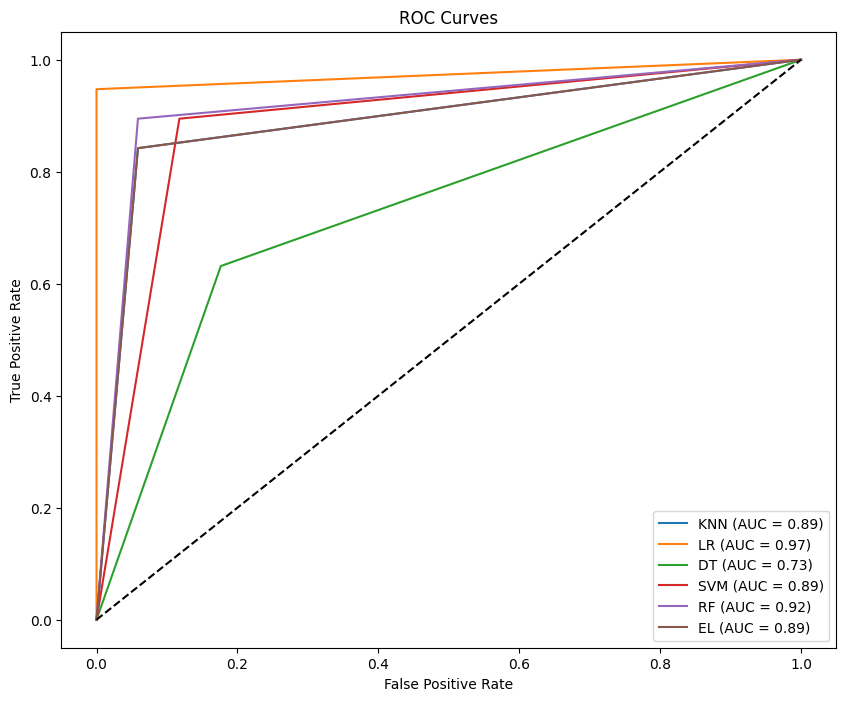

In [ ]:
# Plotting ROC curves
plt.figure(figsize=(10, 8))
for i, (name, model) in enumerate(models):
    fpr, tpr, _ = metrics.roc_curve(y_test, model.predict(x_test))
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_aucs[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

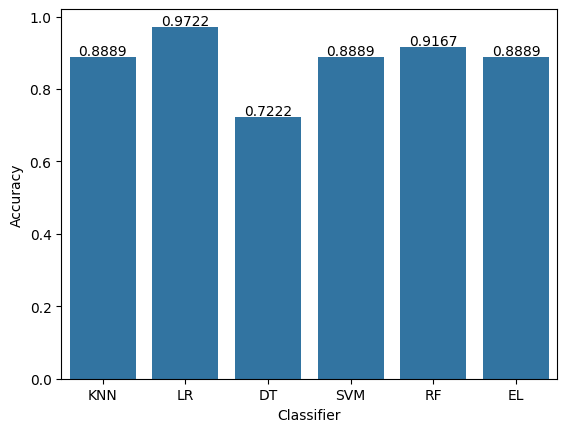

In [ ]:
import seaborn as sns
axis = sns.barplot(x = 'Name', y = 'Accuracy', data =tr_split )
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center")

plt.show()